## Aggregate Champion Meta Comparison
Gulliver Wutz

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_colwidth', 500)

In [56]:
champion_meta_lolalytics = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/champion_meta_lolalytics_com.csv')
champion_meta_metasrc = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/champion_meta_metasrc_com.csv')
champion_meta_ugg = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/champion_meta_u_gg.csv')
champion_meta_data = pd.concat([champion_meta_lolalytics, champion_meta_metasrc, champion_meta_ugg], axis=0)
champion_meta_data['Name'] = champion_meta_data['Name'].replace('Nunu', 'Nunu & Willump')
champion_meta_data['Name'] = champion_meta_data['Name'].replace('Red Kayn', 'Kayn')
champion_meta_data['Name'].unique()

array(['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar', 'Amumu', 'Anivia',
       'Annie', 'Aphelios', 'Ashe', 'Aurelion Sol', 'Azir', 'Bard',
       "Bel'Veth", 'Blitzcrank', 'Brand', 'Braum', 'Briar', 'Caitlyn',
       'Camille', 'Cassiopeia', "Cho'Gath", 'Corki', 'Darius', 'Diana',
       'Dr. Mundo', 'Draven', 'Ekko', 'Elise', 'Evelynn', 'Ezreal',
       'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen',
       'Gnar', 'Gragas', 'Graves', 'Gwen', 'Hecarim', 'Heimerdinger',
       'Hwei', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'Jarvan IV', 'Jax',
       'Jayce', 'Jhin', 'Jinx', "K'Sante", "Kai'Sa", 'Kalista', 'Karma',
       'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen',
       "Kha'Zix", 'Kindred', 'Kled', "Kog'Maw", 'LeBlanc', 'Lee Sin',
       'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux',
       'Malphite', 'Malzahar', 'Maokai', 'Master Yi', 'Milio',
       'Miss Fortune', 'Mordekaiser', 'Morgana', 'Naafiri', 'Nami',
       'Nasus', 'Nautilus'

#### Get Average Win/Pick/Ban-Rate and Matches played for a Champion across Patches for a specific Region/Rank

In [84]:
champion = "Yasuo" #<-- Champion name
region = "World" #<-- Server region
rank = "ALL" #<-- 'ALL' for average of all ranks

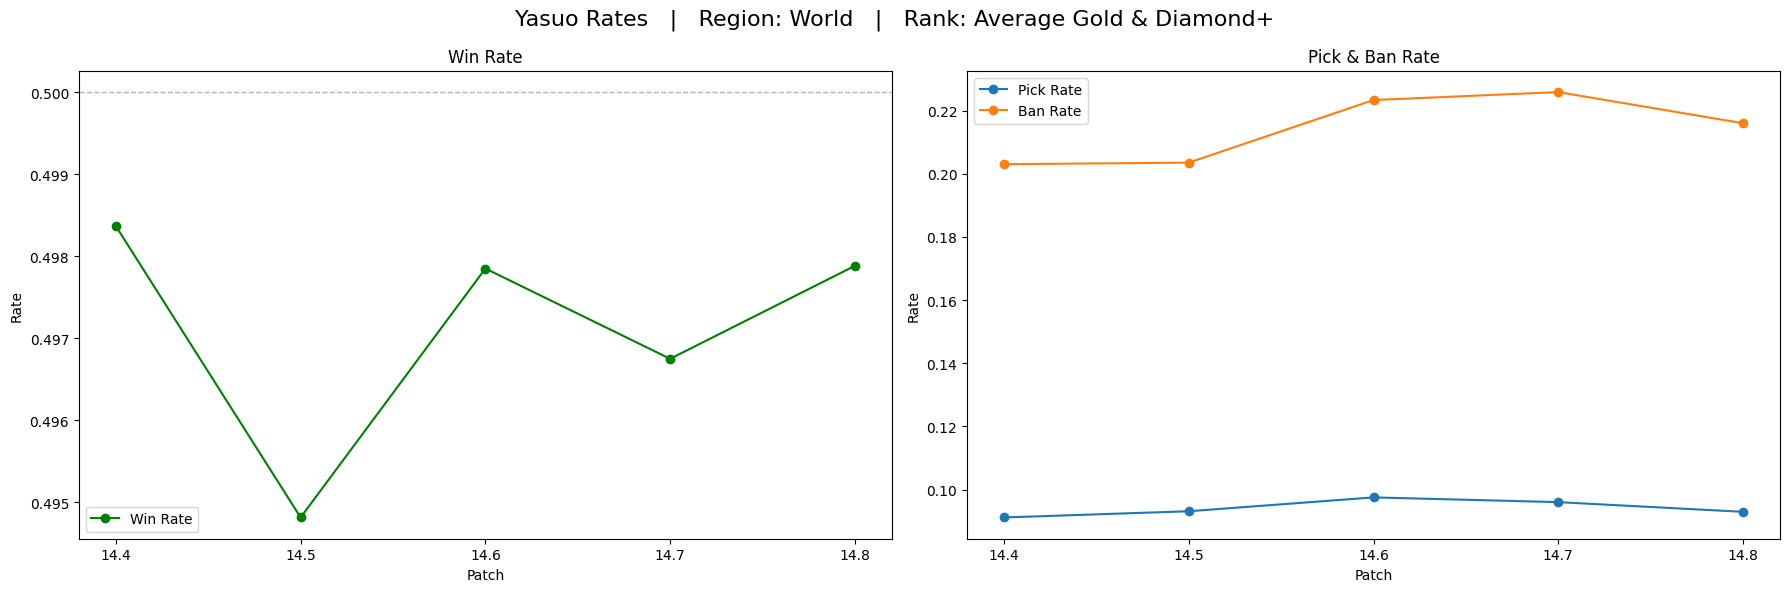

In [85]:
# EDIT ABOVE PARAMETERS, THEN EXECUTE THIS BLOCK
meta_data = champion_meta_data[champion_meta_data['Name'] == champion]
meta_data = meta_data[meta_data['Region'] == region]
if rank != 'ALL':
      meta_data = meta_data[meta_data['Rank'] == rank]
      rank_name = rank
else:
      rank_name = 'Average Gold & Diamond+'

meta_data = meta_data.groupby('Patch').agg({'Win Rate': 'mean',
                                            'Pick Rate': 'mean',
                                            'Ban Rate': 'mean',
                                            'Matches': 'mean',}).reset_index()
meta_data['Patch'] = meta_data['Patch'].astype(str)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)  # 1 row, 3 columns

# Plot 1: Win Rate
axes[0].plot(meta_data['Patch'], meta_data['Win Rate'], color = 'green', marker='o', label='Win Rate')
axes[0].set_title('Win Rate')
axes[0].set_xlabel('Patch')
axes[0].set_ylabel('Rate')
axes[0].legend()#, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(False)

# Dashed horizontal line
axes[0].axhline(y=0.5, color='black', alpha=0.3, linestyle='--', linewidth=1)
#axes[0].text(len(meta_data['Patch']) + 0.2, -0.18, '50% Mark', color='red', fontsize=7, verticalalignment='bottom')

# Plot 2: Pick Rate & Ban Rate
axes[1].plot(meta_data['Patch'], meta_data['Pick Rate'], marker='o', label='Pick Rate')
axes[1].plot(meta_data['Patch'], meta_data['Ban Rate'], marker='o', label='Ban Rate')
axes[1].set_title('Pick & Ban Rate')
axes[1].set_xlabel('Patch')
axes[1].set_ylabel('Rate')
axes[1].legend()#, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(False)

super_title = champion + ' Rates   |   Region: ' + region + '   |   Rank: ' + rank_name
fig.suptitle(super_title, fontsize=16)
plt.tight_layout()

# Display the plots
plt.show()

#### Get Champion Stats across Patches

In [86]:
def calculate_average(cost_string):
    numbers = list(map(float, cost_string.split('/')))
    return sum(numbers) / len(numbers)

data_dragon_meta = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/champion_stats_ddragon.csv')
for spell_stat in ['Q Cooldown', 'Q Cost', 'Q Range', 'W Cooldown', 'W Cost', 'W Range', 'E Cooldown', 'E Cost', 'E Range', 'R Cooldown', 'R Cost', 'R Range']:
    column_name = spell_stat + ' Average'
    data_dragon_meta[column_name] = data_dragon_meta[spell_stat].apply(calculate_average)

In [88]:
champion = "Yasuo" #<-- Champion name

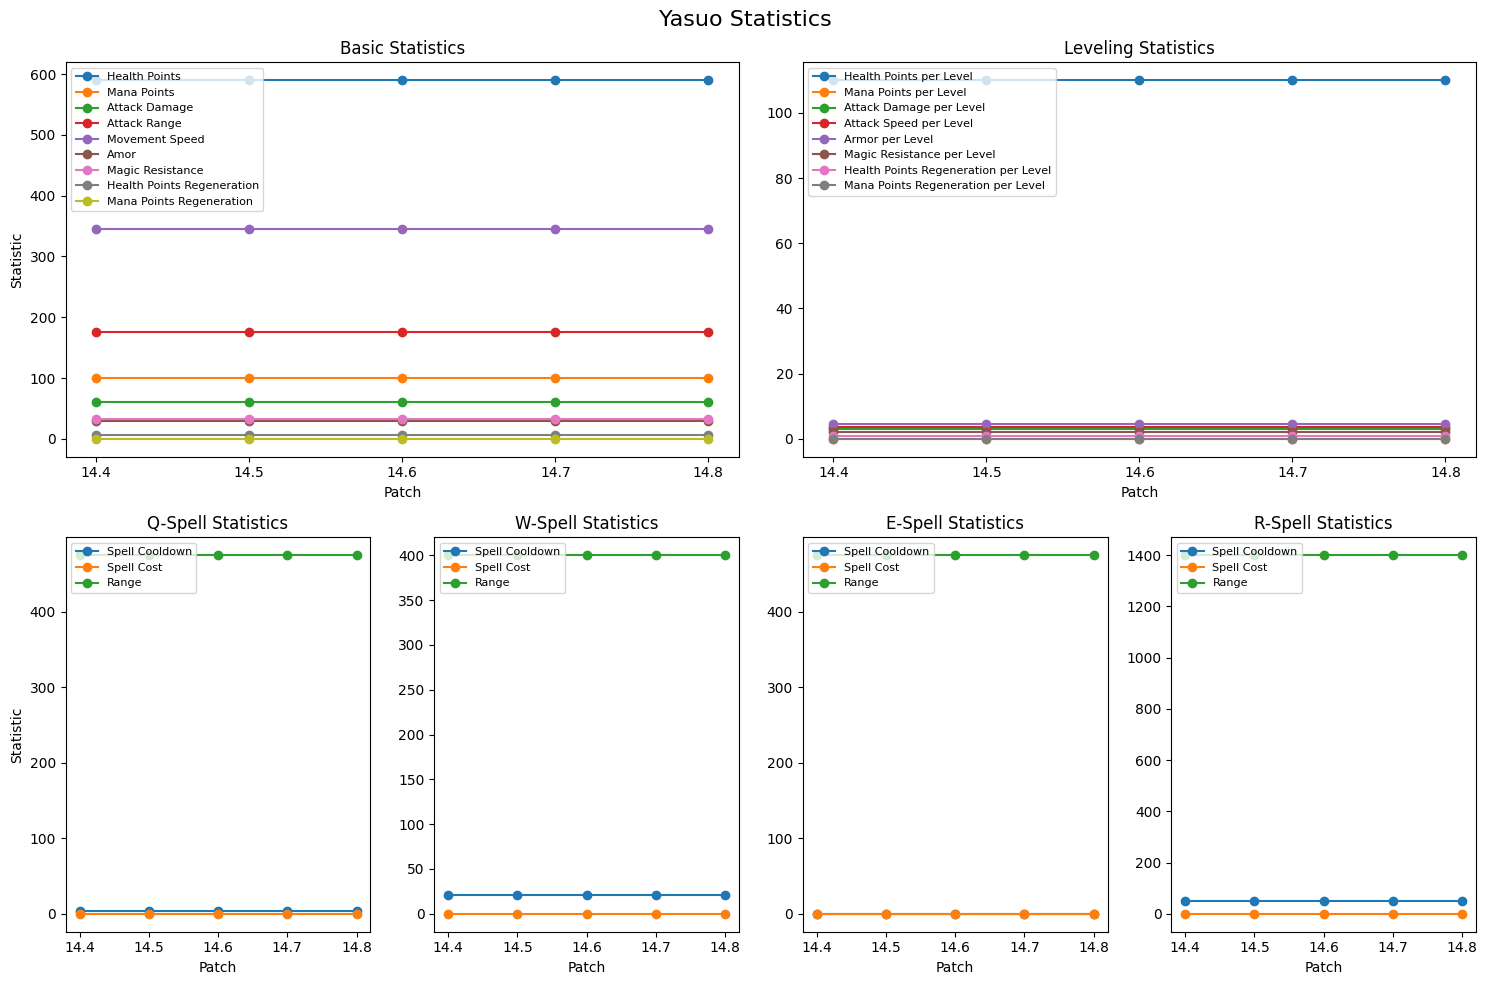

In [89]:
# EDIT PARAMETER ABOVE, THEN EXECUTE THIS BLOCK
dd_meta_data = data_dragon_meta[data_dragon_meta['Name'] == champion]
dd_meta_data = dd_meta_data.sort_values(by='Patch')
dd_meta_data.loc[:, 'Patch'] = dd_meta_data['Patch'].astype(str)
dd_meta_data

# Create a figure with GridSpec
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 4, figure=fig) 
ax1 = fig.add_subplot(gs[0, :2]) 
ax2 = fig.add_subplot(gs[0, 2:])  
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[1, 3])

# Plot 1: Basic Statistics
ax1.plot(dd_meta_data['Patch'], dd_meta_data['hp'], marker='o', label='Health Points')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['mp'], marker='o', label='Mana Points')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['attackdamage'], marker='o', label='Attack Damage')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['attackrange'], marker='o', label='Attack Range')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['movespeed'], marker='o', label='Movement Speed')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['armor'], marker='o', label='Amor')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['spellblock'], marker='o', label='Magic Resistance')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['hpregen'], marker='o', label='Health Points Regeneration')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['mpregen'], marker='o', label='Mana Points Regeneration')
ax1.set_title('Basic Statistics')
ax1.set_xlabel('Patch')
ax1.set_ylabel('Statistic')
ax1.legend(fontsize=8, loc='upper left')
ax1.grid(False)

# Plot 2: Leveling Statistics
ax2.plot(dd_meta_data['Patch'], dd_meta_data['hpperlevel'], marker='o', label='Health Points per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['mpperlevel'], marker='o', label='Mana Points per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['attackdamageperlevel'], marker='o', label='Attack Damage per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['attackspeedperlevel'], marker='o', label='Attack Speed per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['armorperlevel'], marker='o', label='Armor per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['spellblockperlevel'], marker='o', label='Magic Resistance per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['hpregenperlevel'], marker='o', label='Health Points Regeneration per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['mpregenperlevel'], marker='o', label='Mana Points Regeneration per Level')
ax2.set_title('Leveling Statistics')
ax2.set_xlabel('Patch')
ax2.legend(fontsize=8, loc='upper left')
ax2.grid(False)

# Plot 3: Q-Spell Statistics
ax3.plot(dd_meta_data['Patch'], dd_meta_data['Q Cooldown Average'], marker='o', label='Spell Cooldown')
ax3.plot(dd_meta_data['Patch'], dd_meta_data['Q Cost Average'], marker='o', label='Spell Cost')
ax3.plot(dd_meta_data['Patch'], dd_meta_data['Q Range Average'], marker='o', label='Range')
ax3.set_title('Q-Spell Statistics')
ax3.set_xlabel('Patch')
ax3.set_ylabel('Statistic')
ax3.legend(fontsize=8, loc='upper left')
ax3.grid(False)

# Plot 4: W-Spell Statistics
ax4.plot(dd_meta_data['Patch'], dd_meta_data['W Cooldown Average'], marker='o', label='Spell Cooldown')
ax4.plot(dd_meta_data['Patch'], dd_meta_data['W Cost Average'], marker='o', label='Spell Cost')
ax4.plot(dd_meta_data['Patch'], dd_meta_data['W Range Average'], marker='o', label='Range')
ax4.set_title('W-Spell Statistics')
ax4.set_xlabel('Patch')
ax4.legend(fontsize=8, loc='upper left')
ax4.grid(False)

# Plot 5: E-Spell Statistics
ax5.plot(dd_meta_data['Patch'], dd_meta_data['E Cooldown Average'], marker='o', label='Spell Cooldown')
ax5.plot(dd_meta_data['Patch'], dd_meta_data['E Cost Average'], marker='o', label='Spell Cost')
ax5.plot(dd_meta_data['Patch'], dd_meta_data['E Range Average'], marker='o', label='Range')
ax5.set_title('E-Spell Statistics')
ax5.set_xlabel('Patch')
ax5.legend(fontsize=8, loc='upper left')
ax5.grid(False)

# Plot 6: R-Spell Statistics
ax6.plot(dd_meta_data['Patch'], dd_meta_data['R Cooldown Average'], marker='o', label='Spell Cooldown')
ax6.plot(dd_meta_data['Patch'], dd_meta_data['R Cost Average'], marker='o', label='Spell Cost')
ax6.plot(dd_meta_data['Patch'], dd_meta_data['R Range Average'], marker='o', label='Range')
ax6.set_title('R-Spell Statistics')
ax6.set_xlabel('Patch')
ax6.legend(fontsize=8, loc='upper left')
ax6.grid(False)

super_title = champion + ' Statistics'
fig.suptitle(super_title, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1]) 

#### Get Normalized Champion Stats across Patches

In [8]:
def calculate_average(cost_string):
    numbers = list(map(float, cost_string.split('/')))
    return sum(numbers) / len(numbers)

data_dragon_meta = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/champion_stats_ddragon.csv')
for spell_stat in ['Q Cooldown', 'Q Cost', 'Q Range', 'W Cooldown', 'W Cost', 'W Range', 'E Cooldown', 'E Cost', 'E Range', 'R Cooldown', 'R Cost', 'R Range']:
    column_name = spell_stat + ' Average'
    data_dragon_meta[column_name] = data_dragon_meta[spell_stat].apply(calculate_average)

columns_to_normalize = ['hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed',
       'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel',
       'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen',
       'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed', 'Q Cooldown Average', 'Q Cost Average',
       'Q Range Average', 'W Cooldown Average', 'W Cost Average',
       'W Range Average', 'E Cooldown Average', 'E Cost Average',
       'E Range Average', 'R Cooldown Average', 'R Cost Average',
       'R Range Average']
data_dragon_meta[columns_to_normalize] = data_dragon_meta[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

In [9]:
champion = "Smolder" #<-- Champion name

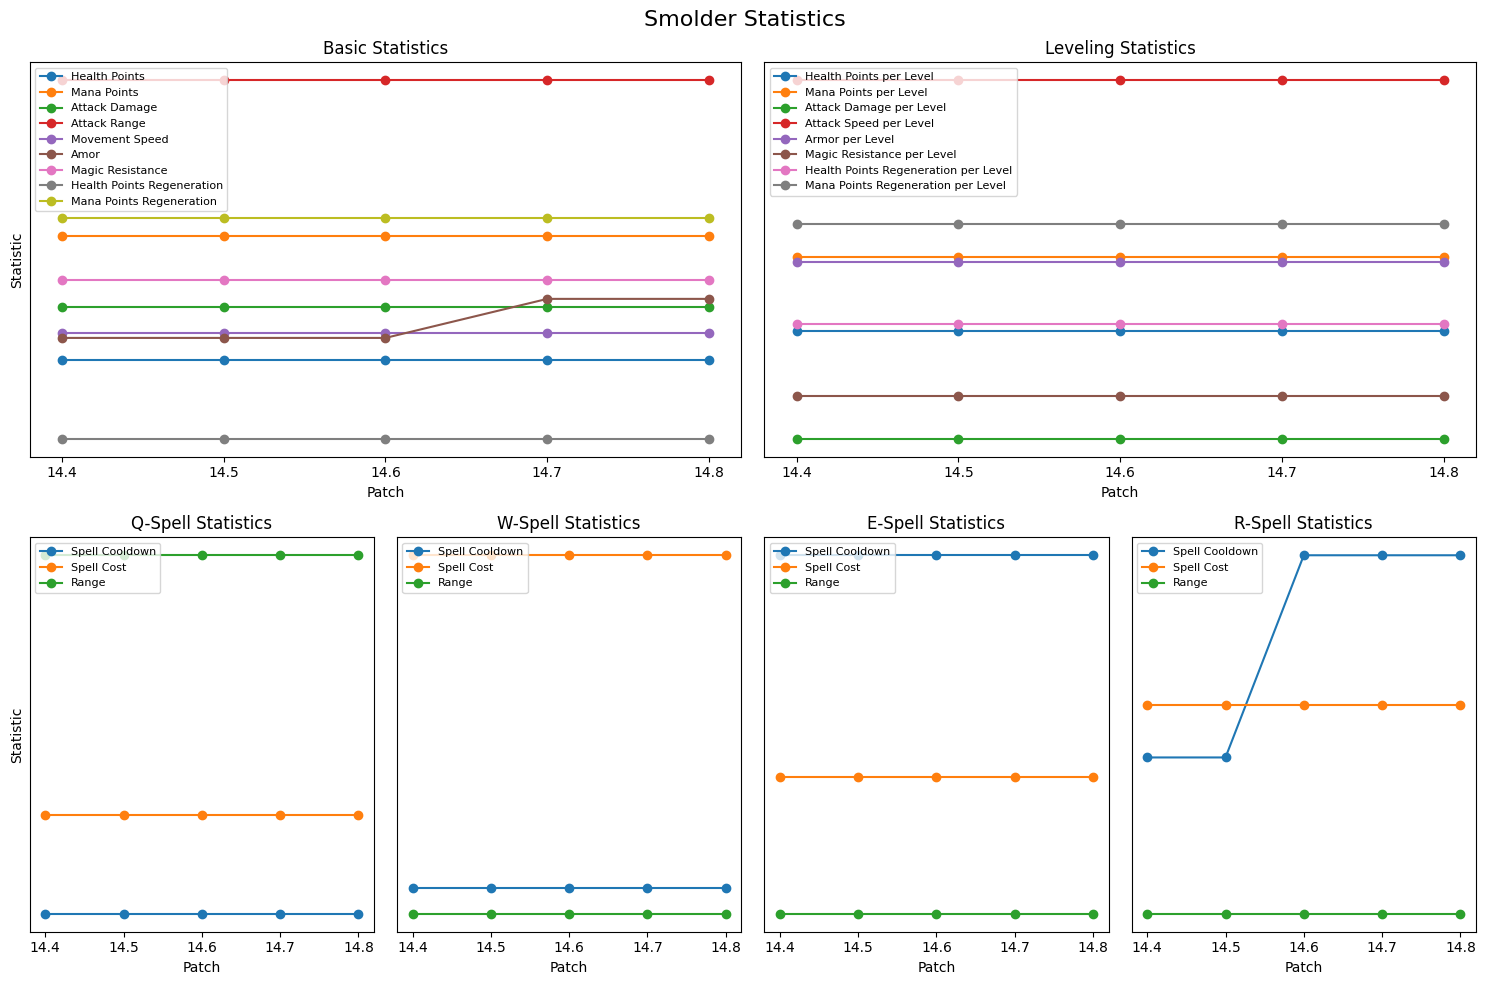

In [10]:
# EDIT PARAMETER ABOVE, THEN EXECUTE THIS BLOCK
dd_meta_data = data_dragon_meta[data_dragon_meta['Name'] == champion]
dd_meta_data = dd_meta_data.sort_values(by='Patch')
dd_meta_data.loc[:, 'Patch'] = dd_meta_data['Patch'].astype(str)
dd_meta_data

# Create a figure with GridSpec
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 4, figure=fig) 
ax1 = fig.add_subplot(gs[0, :2]) 
ax2 = fig.add_subplot(gs[0, 2:])  
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[1, 3])

# Plot 1: Basic Statistics
ax1.plot(dd_meta_data['Patch'], dd_meta_data['hp'], marker='o', label='Health Points')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['mp'], marker='o', label='Mana Points')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['attackdamage'], marker='o', label='Attack Damage')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['attackrange'], marker='o', label='Attack Range')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['movespeed'], marker='o', label='Movement Speed')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['armor'], marker='o', label='Amor')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['spellblock'], marker='o', label='Magic Resistance')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['hpregen'], marker='o', label='Health Points Regeneration')
ax1.plot(dd_meta_data['Patch'], dd_meta_data['mpregen'], marker='o', label='Mana Points Regeneration')
ax1.set_title('Basic Statistics')
ax1.set_xlabel('Patch')
ax1.set_ylabel('Statistic')
ax1.yaxis.set_ticks([])
ax1.legend(fontsize=8, loc='upper left')
ax1.grid(False)

# Plot 2: Leveling Statistics
ax2.plot(dd_meta_data['Patch'], dd_meta_data['hpperlevel'], marker='o', label='Health Points per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['mpperlevel'], marker='o', label='Mana Points per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['attackdamageperlevel'], marker='o', label='Attack Damage per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['attackspeedperlevel'], marker='o', label='Attack Speed per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['armorperlevel'], marker='o', label='Armor per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['spellblockperlevel'], marker='o', label='Magic Resistance per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['hpregenperlevel'], marker='o', label='Health Points Regeneration per Level')
ax2.plot(dd_meta_data['Patch'], dd_meta_data['mpregenperlevel'], marker='o', label='Mana Points Regeneration per Level')
ax2.set_title('Leveling Statistics')
ax2.set_xlabel('Patch')
ax2.yaxis.set_ticks([])
ax2.legend(fontsize=8, loc='upper left')
ax2.grid(False)

# Plot 3: Q-Spell Statistics
ax3.plot(dd_meta_data['Patch'], dd_meta_data['Q Cooldown Average'], marker='o', label='Spell Cooldown')
ax3.plot(dd_meta_data['Patch'], dd_meta_data['Q Cost Average'], marker='o', label='Spell Cost')
ax3.plot(dd_meta_data['Patch'], dd_meta_data['Q Range Average'], marker='o', label='Range')
ax3.set_title('Q-Spell Statistics')
ax3.set_xlabel('Patch')
ax3.set_ylabel('Statistic')
ax3.yaxis.set_ticks([])
ax3.legend(fontsize=8, loc='upper left')
ax3.grid(False)

# Plot 4: W-Spell Statistics
ax4.plot(dd_meta_data['Patch'], dd_meta_data['W Cooldown Average'], marker='o', label='Spell Cooldown')
ax4.plot(dd_meta_data['Patch'], dd_meta_data['W Cost Average'], marker='o', label='Spell Cost')
ax4.plot(dd_meta_data['Patch'], dd_meta_data['W Range Average'], marker='o', label='Range')
ax4.set_title('W-Spell Statistics')
ax4.set_xlabel('Patch')
ax4.yaxis.set_ticks([])
ax4.legend(fontsize=8, loc='upper left')
ax4.grid(False)

# Plot 5: E-Spell Statistics
ax5.plot(dd_meta_data['Patch'], dd_meta_data['E Cooldown Average'], marker='o', label='Spell Cooldown')
ax5.plot(dd_meta_data['Patch'], dd_meta_data['E Cost Average'], marker='o', label='Spell Cost')
ax5.plot(dd_meta_data['Patch'], dd_meta_data['E Range Average'], marker='o', label='Range')
ax5.set_title('E-Spell Statistics')
ax5.set_xlabel('Patch')
ax5.yaxis.set_ticks([])
ax5.legend(fontsize=8, loc='upper left')
ax5.grid(False)

# Plot 6: R-Spell Statistics
ax6.plot(dd_meta_data['Patch'], dd_meta_data['R Cooldown Average'], marker='o', label='Spell Cooldown')
ax6.plot(dd_meta_data['Patch'], dd_meta_data['R Cost Average'], marker='o', label='Spell Cost')
ax6.plot(dd_meta_data['Patch'], dd_meta_data['R Range Average'], marker='o', label='Range')
ax6.set_title('R-Spell Statistics')
ax6.set_xlabel('Patch')
ax6.yaxis.set_ticks([])
ax6.legend(fontsize=8, loc='upper left')
ax6.grid(False)

super_title = champion + ' Statistics'
fig.suptitle(super_title, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1]) 